In [8]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

In [9]:
url = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2018-03-04/visualisations/listings.csv'

In [10]:
df = pd.read_csv(url, sep=',')

In [6]:
print(df.head())

     id                                               name  host_id  \
0   958                Bright, Modern Garden Unit - 1BR/1B     1169   
1  5858                                 Creative Sanctuary     8904   
2  7918         A Friendly Room - UCSF/USF - San Francisco    21994   
3  8014      Newly Remodeled room in big house WIFI market    22402   
4  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   

          host_name  neighbourhood_group     neighbourhood   latitude  \
0             Holly                  NaN  Western Addition  37.769310   
1  Philip And Tania                  NaN    Bernal Heights  37.745112   
2             Aaron                  NaN    Haight Ashbury  37.766690   
3               Jia                  NaN     Outer Mission  37.730746   
4             Aaron                  NaN    Haight Ashbury  37.764872   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.433856  Entire home/apt    170               1     

In [196]:
df.shape

(4804, 16)

In [214]:
nh_counts = df['neighbourhood'].value_counts(dropna=False)
nh_counts

Mission                  522
Western Addition         372
Castro/Upper Market      301
Bernal Heights           299
Downtown/Civic Center    288
Noe Valley               239
South of Market          239
Haight Ashbury           212
Outer Sunset             200
Inner Richmond           176
Potrero Hill             159
Outer Mission            137
Nob Hill                 127
Bayview                  123
Marina                   122
Pacific Heights          115
Excelsior                108
Inner Sunset             104
Outer Richmond           103
Russian Hill             103
North Beach              100
West of Twin Peaks        99
Parkside                  90
Ocean View                83
Financial District        63
Glen Park                 53
Chinatown                 51
Twin Peaks                49
Visitacion Valley         46
Crocker Amazon            35
Lakeshore                 26
Presidio Heights          20
Seacliff                  18
Diamond Heights           16
Golden Gate Pa

In [48]:
import matplotlib.pyplot as plt

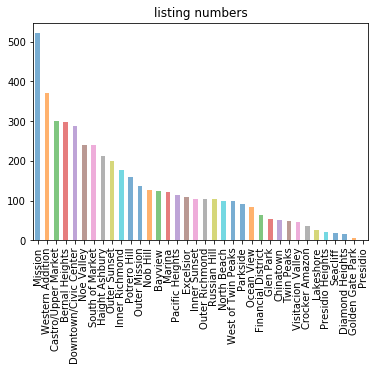

In [215]:
nh_counts.plot(kind='bar', title = 'listing numbers', alpha = 0.6)

In [ ]:
# Listing number changes with time

In [61]:
df_roomtype = df['room_type'].value_counts(dropna=False)

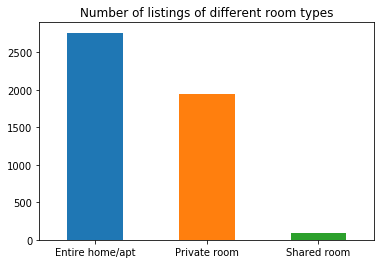

In [139]:
df_roomtype.plot(kind='bar',title = 'Number of listings of different room types', rot=0)

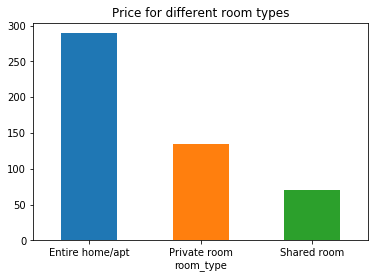

In [138]:
df.groupby('room_type')['price'].mean().plot(kind='bar', title = 'Price for different room types', rot=0)
# Conclusion: The price for entire homes is highest, and price for shared rooms is lowest.

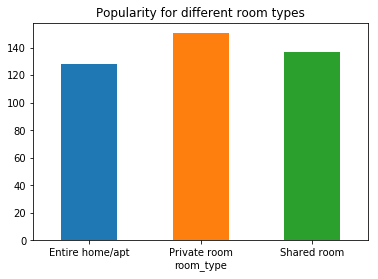

In [140]:
df.groupby('room_type')['availability_365'].mean().plot(kind='bar', title = 'Availability for different room types', rot=0)

In [128]:
df['neighbourhood_group'].value_counts(dropna=False)

NaN    4804
Name: neighbourhood_group, dtype: int64

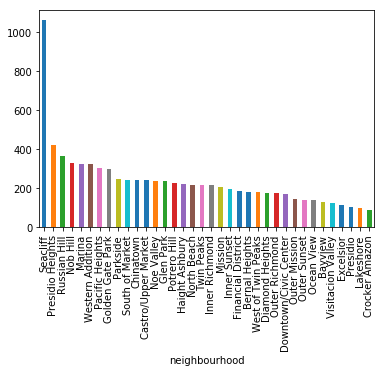

In [112]:
nh_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
nh_price.plot(kind='bar')

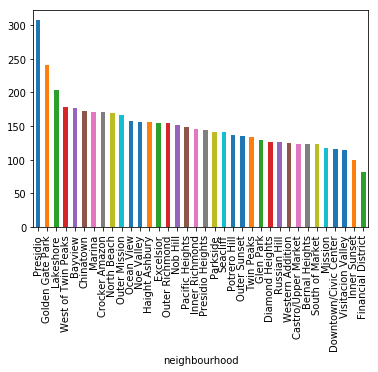

In [119]:
# This shows the popularity of different neighbourhoods in San Francisco
nh_avail = df.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False)
nh_avail.plot(kind='bar')

In [216]:
price_avail = pd.concat([nh_price, nh_avail, nh_counts], axis = 1)
price_avail

,price,availability_365,neighbourhood
Bayview,127.284553,175.975610,123
Bernal Heights,178.662207,123.789298,299
Castro/Upper Market,238.920266,124.039867,301
Chinatown,241.686275,172.627451,51
Crocker Amazon,88.742857,170.685714,35
Diamond Heights,177.000000,126.562500,16
Downtown/Civic Center,170.197917,115.298611,288
Excelsior,114.333333,155.101852,108
Financial District,183.761905,81.380952,63
Glen Park,235.169811,129.622642,53


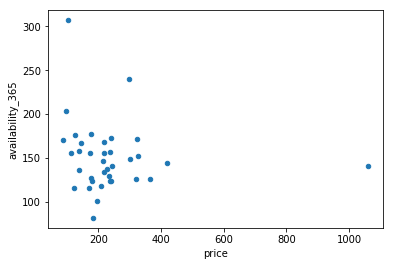

In [126]:
price_avail.plot(kind = 'scatter', x = 'price', y = 'availability_365')
# Maybe I need to group these neighbourhoods into bigger district.

In [217]:
import matplotlib.pyplot as plt
import numpy as np

In [220]:
np_listingcounts = np.array(nh_counts)
np_listingcounts *= 2

Text(0,0.5,'Availability in next 365 days [in days]')

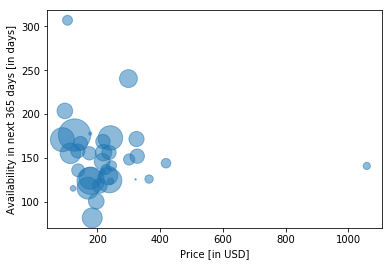

In [222]:
# set s argument
plt.scatter(price_avail['price'], price_avail['availability_365'], s = np_listingcounts, alpha=0.5)

# Previous customizations
plt.xlabel('Price [in USD]')
plt.ylabel('Availability in next 365 days [in days]')

#The bubble size in the figure below shows the number of listings in that neighbourhood.

In [150]:
df.minimum_nights.value_counts().sort_values()

8               1
17              1
13              1
9               1
85              1
185             1
100000000       1
1000            1
140             1
120             1
1125            1
190             1
28              1
365             1
12              1
999             2
25              2
29              3
180             3
15              3
21              4
60              5
90              5
14              6
10             10
32             19
6              32
31             53
7              65
5             178
4             237
30            657
3             872
1            1235
2            1398
Name: minimum_nights, dtype: int64

In [159]:
df.minimum_nights.median()

2.0

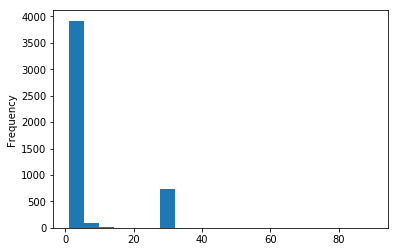

In [90]:
df[df.minimum_nights<100]['minimum_nights'].plot(kind='hist', bins=20)

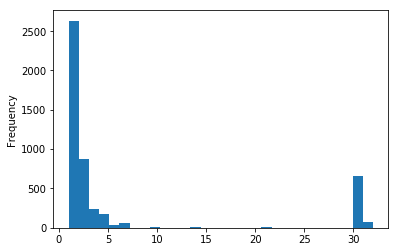

In [93]:
df[df.minimum_nights<50]['minimum_nights'].plot(kind='hist', bins=30)

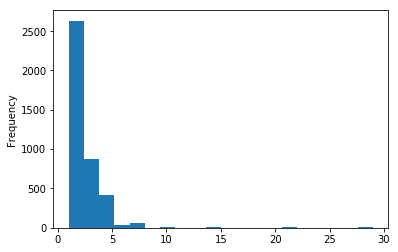

In [95]:
df[df.minimum_nights<30]['minimum_nights'].plot(kind='hist', bins=20)

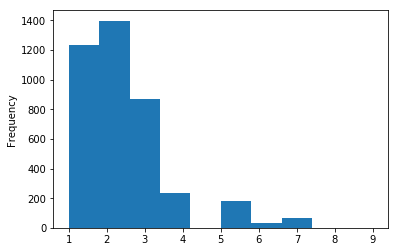

In [97]:
df[df.minimum_nights<10]['minimum_nights'].plot(kind='hist', bins=10)

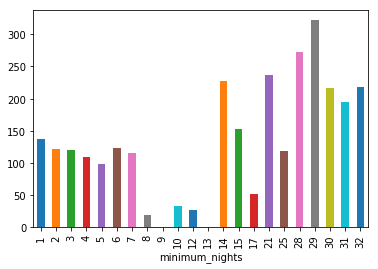

In [148]:
df[df.minimum_nights<35].groupby('minimum_nights')['availability_365'].mean().plot(kind = 'bar')

In [192]:
df1 = df[df.availability_365 == 0]
df2 = df1[df1['number_of_reviews'] == 0]
df2.shape
# There are 69 entries that are not active listings. just use !=

(69, 16)

In [227]:
df[(df.availability_365 == 0) & (df.number_of_reviews == 0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
543,1120656,Room for two in the Inner Sunset,6148057,Peter,NaN,Inner Sunset,37.761468,-122.472599,Private room,180,2,0,NaN,NaN,3,0
1065,3102139,Modern Home in Castro,6737179,Lyssa,NaN,Castro/Upper Market,37.758888,-122.432272,Entire home/apt,550,2,0,NaN,NaN,1,0
1164,3615642,Spacious and Sunny by the Bay,214187,Alan,NaN,Marina,37.806324,-122.436486,Private room,150,30,0,NaN,NaN,1,0
1389,4777677,Cozy Lower Pac Heights Apartment,1539772,Brian,NaN,Western Addition,37.784983,-122.444691,Private room,295,1,0,NaN,NaN,1,0
1503,5436115,Private Bedroom in the Dogpatch!,18014246,Carlos,NaN,Potrero Hill,37.759308,-122.387524,Private room,85,30,0,NaN,NaN,1,0
1888,7785565,Studio in downtown,40968695,Devanshi,NaN,Downtown/Civic Center,37.788434,-122.412801,Entire home/apt,60,1,0,NaN,NaN,1,0
1972,8128524,Noe Valley Home,42922912,Anna,NaN,Noe Valley,37.749165,-122.429452,Entire home/apt,2800,5,0,NaN,NaN,2,0
1977,8159544,Modern/Convenient SOMA Room,4981058,Fred,NaN,South of Market,37.775144,-122.408968,Private room,200,13,0,NaN,NaN,1,0
2013,8342838,Spacious room in luxury 2BD/2BA,22254657,Chirag,NaN,Financial District,37.784240,-122.399246,Private room,100,180,0,NaN,NaN,1,0
2037,8484211,Unique Private Room in Noe Valley,13005900,Olivier And Alexandra,NaN,Noe Valley,37.747387,-122.437462,Private room,110,2,0,NaN,NaN,3,0


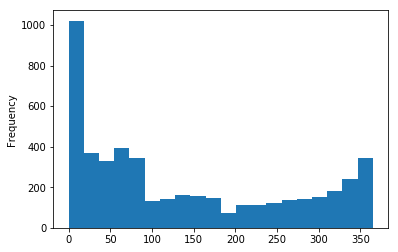

In [99]:
df['availability_365'].plot(kind='hist',bins=20)

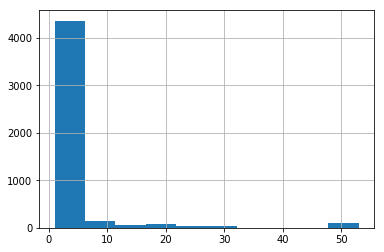

In [129]:
df['calculated_host_listings_count'].hist()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 16 columns):
id                                4804 non-null int64
name                              4804 non-null object
host_id                           4804 non-null int64
host_name                         4776 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     4804 non-null object
latitude                          4804 non-null float64
longitude                         4804 non-null float64
room_type                         4804 non-null object
price                             4804 non-null int64
minimum_nights                    4804 non-null int64
number_of_reviews                 4804 non-null int64
last_review                       4396 non-null object
reviews_per_month                 4381 non-null float64
calculated_host_listings_count    4804 non-null int64
availability_365                  4804 non-null int64
dtypes: float64(4),

In [8]:
import matplotlib.pyplot as plt

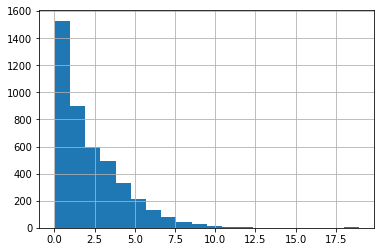

In [104]:
# Visualize the distribution of reviews per month
df[df.reviews_per_month<20]['reviews_per_month'].hist(bins=20)

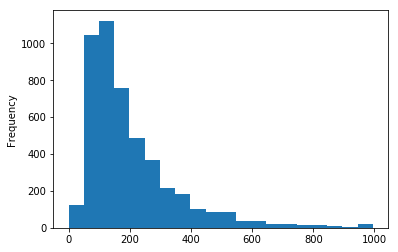

In [109]:
# Visualize the distribution of price
df[df.price<1000].price.plot(kind='hist', bins=20)

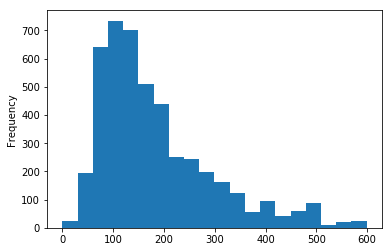

In [110]:
df[df.price<600].price.plot(kind='hist', bins=20)

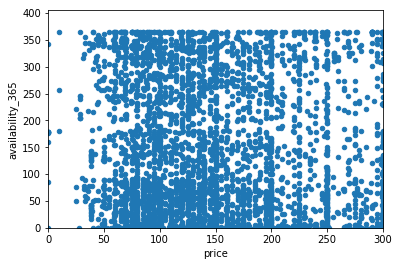

In [21]:
df.plot(kind='scatter', x='price', y='availability_365',xlim=(0,300), ylim=(0,405))
# Can't really tell if the availability is dependent on price.

In [1]:
url_cal='http://data.insideairbnb.com/united-states/ca/san-francisco/2018-03-04/data/calendar.csv.gz'

In [3]:
import pandas as pd

In [24]:
df_cal = pd.read_csv(url_cal, sep=',',encoding = 'utf-8')

In [25]:
df_booking = df_cal[df_cal['available']!='f']

In [26]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753460 entries, 0 to 1753459
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 53.5+ MB


In [226]:
df_booking[df_booking['listing_id'] == 6938818].head()

,listing_id,date,available,price
29,6938818,2018-11-11,t,$69.00
30,6938818,2018-11-10,t,$69.00
31,6938818,2018-11-09,t,$69.00
32,6938818,2018-11-08,t,$69.00
33,6938818,2018-11-07,t,$69.00


In [30]:
url_rev = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2018-03-04/data/reviews.csv.gz'

In [33]:
df_rev = pd.read_csv(url_rev, sep=',')

In [38]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Ted,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


In [35]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233230 entries, 0 to 233229
Data columns (total 6 columns):
listing_id       233230 non-null int64
id               233230 non-null int64
date             233230 non-null object
reviewer_id      233230 non-null int64
reviewer_name    233229 non-null object
comments         233056 non-null object
dtypes: int64(3), object(3)
memory usage: 10.7+ MB


In [37]:
url_listing = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2018-03-04/data/listings.csv.gz'

In [39]:
df_listing = pd.read_csv(url_listing, sep=',')

In [40]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20180303203625,2018-03-04,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1.21
1,5858,https://www.airbnb.com/rooms/5858,20180303203625,2018-03-04,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict,f,f,1,1.04
2,7918,https://www.airbnb.com/rooms/7918,20180303203625,2018-03-04,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict,f,f,7,0.16
3,8014,https://www.airbnb.com/rooms/8014,20180303203625,2018-03-04,Newly Remodeled room in big house WIFI market,Freshly painted newly done laminate floor with...,The room is recently painted in the color of c...,Freshly painted newly done laminate floor with...,none,"The neighborhood is very residential, close to...",...,t,STR-0000974,"{""SAN FRANCISCO""}",t,f,moderate,f,f,3,1.12
4,8142,https://www.airbnb.com/rooms/8142,20180303203625,2018-03-04,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict,f,f,7,0.16


In [41]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [45]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 96 columns):
id                                  4804 non-null int64
listing_url                         4804 non-null object
scrape_id                           4804 non-null int64
last_scraped                        4804 non-null object
name                                4804 non-null object
summary                             4645 non-null object
space                               4148 non-null object
description                         4802 non-null object
experiences_offered                 4804 non-null object
neighborhood_overview               3655 non-null object
notes                               3138 non-null object
transit                             3756 non-null object
access                              3707 non-null object
interaction                         3558 non-null object
house_rules                         3841 non-null object
thumbnail_url                       0 no

In [201]:
df_listing['bedrooms'].value_counts()

1     2814
2      872
0      489
3      441
4      129
15      30
5       19
6        9
8        1
Name: bedrooms, dtype: int64

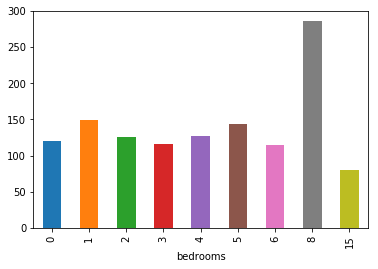

In [207]:
df_listing.groupby('bedrooms')['availability_365'].mean().plot(kind='bar')

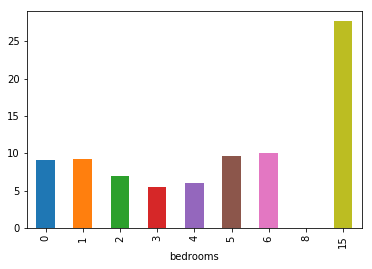

In [208]:
df_listing.groupby('bedrooms')['availability_30'].mean().plot(kind='bar')

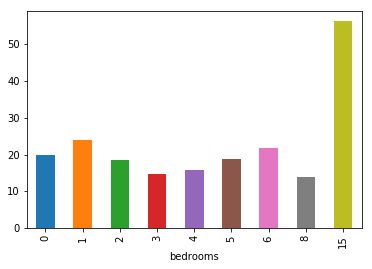

In [209]:
df_listing.groupby('bedrooms')['availability_60'].mean().plot(kind='bar')

In [233]:
df_listing[(df_listing.availability_365 == 0) & (df_listing.number_of_reviews == 0)].loc[:,['last_review','review_scores_rating','host_since']]

,last_review,review_scores_rating,host_since
543,NaN,NaN,2013-04-29
1065,NaN,NaN,2013-06-04
1164,NaN,NaN,2010-08-26
1389,NaN,NaN,2011-12-27
1503,NaN,NaN,2014-07-12
1888,NaN,NaN,2015-08-09
1972,NaN,NaN,2015-08-30
1977,NaN,NaN,2013-02-05
2013,NaN,NaN,2014-10-07
2037,NaN,NaN,2014-03-10


In [234]:
df_listing[(df_listing.availability_90 == 0) & (df_listing.number_of_reviews == 0)].loc[:,['last_review','review_scores_rating','host_since']]

,last_review,review_scores_rating,host_since
543,NaN,NaN,2013-04-29
1065,NaN,NaN,2013-06-04
1148,NaN,NaN,2014-04-26
1164,NaN,NaN,2010-08-26
1389,NaN,NaN,2011-12-27
1503,NaN,NaN,2014-07-12
1888,NaN,NaN,2015-08-09
1972,NaN,NaN,2015-08-30
1977,NaN,NaN,2013-02-05
1993,NaN,NaN,2015-01-28


In [235]:
df_listing[(df_listing.availability_60 == 0) & (df_listing.number_of_reviews == 0)].loc[:,['last_review','review_scores_rating','host_since']]

,last_review,review_scores_rating,host_since
543,NaN,NaN,2013-04-29
1065,NaN,NaN,2013-06-04
1148,NaN,NaN,2014-04-26
1164,NaN,NaN,2010-08-26
1389,NaN,NaN,2011-12-27
1503,NaN,NaN,2014-07-12
1888,NaN,NaN,2015-08-09
1972,NaN,NaN,2015-08-30
1977,NaN,NaN,2013-02-05
1993,NaN,NaN,2015-01-28


In [236]:
df_listing[(df_listing.availability_30 == 0) & (df_listing.number_of_reviews == 0)].loc[:,['last_review','review_scores_rating','host_since']]

,last_review,review_scores_rating,host_since
543,NaN,NaN,2013-04-29
545,NaN,NaN,2013-04-30
1065,NaN,NaN,2013-06-04
1148,NaN,NaN,2014-04-26
1164,NaN,NaN,2010-08-26
1389,NaN,NaN,2011-12-27
1503,NaN,NaN,2014-07-12
1510,NaN,NaN,2013-12-17
1718,NaN,NaN,2015-06-13
1888,NaN,NaN,2015-08-09


In [241]:
df_clean = df_listing[df_listing['availability_365'] != 0]
df_clean.shape

(4240, 96)

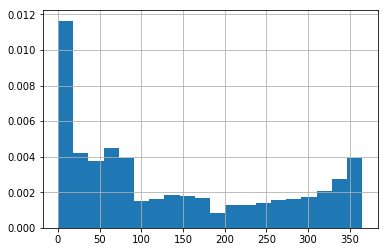

In [281]:
df_listing['availability_365'].hist(normed=True, bins=20)

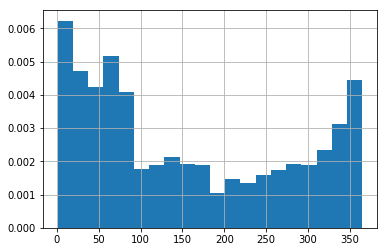

In [304]:
df_clean['availability_365'].hist(normed=True, bins=20)

In [298]:
df_listing['last_review_date']= pd.to_datetime(df_listing['last_review'])

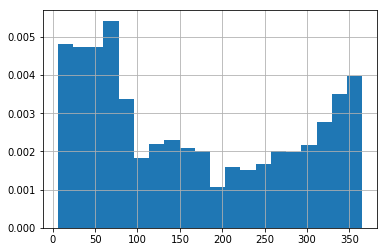

In [308]:
df_listing[(df_listing['last_review_date'] > '2017-03-01')&(df_listing['availability_365']>5)]['availability_365'].hist(normed=True, bins=20)

In [317]:
df_listing[(df_listing['availability_90'] == 0)&(df_listing['number_of_reviews']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 543 to 4736
Data columns (total 97 columns):
id                                  89 non-null int64
listing_url                         89 non-null object
scrape_id                           89 non-null int64
last_scraped                        89 non-null object
name                                89 non-null object
summary                             87 non-null object
space                               47 non-null object
description                         88 non-null object
experiences_offered                 89 non-null object
neighborhood_overview               43 non-null object
notes                               27 non-null object
transit                             45 non-null object
access                              46 non-null object
interaction                         40 non-null object
house_rules                         47 non-null object
thumbnail_url                       0 non-null float64
medium_url     

In [ ]:
#seasonality

In [277]:
nh_counts1 = df_clean['neighbourhood'].value_counts(dropna=False)
nh_counts1

Mission District         457
Richmond District        269
Bernal Heights           245
Western Addition/NOPA    227
Noe Valley               222
Outer Sunset             209
SoMa                     197
The Castro               181
Potrero Hill             140
Nob Hill                 122
Pacific Heights          122
Bayview                  117
Downtown                 107
Haight-Ashbury           103
Inner Sunset              85
Union Square              85
Excelsior                 81
Duboce Triangle           71
Telegraph Hill            71
Crocker Amazon            64
Sunnyside                 62
Marina                    62
Parkside                  59
Lower Haight              58
Glen Park                 56
Cole Valley               54
Russian Hill              52
Mission Terrace           51
Alamo Square              47
Chinatown                 43
Twin Peaks                40
Balboa Terrace            39
North Beach               37
Oceanview                 37
Visitacion Val

In [ ]:
#What is a listing's income?

In [250]:
import json

url_geo = '/Users/forheart/Dropbox/Data Scientist/Capstone Project 1/neighbourhoods.geojson'
with open(url_geo) as f:
    geodata = json.load(f)
print(geodata.keys())

dict_keys(['type', 'features'])


In [263]:
len(geodata['features'])

37

In [269]:
poly = []
for i in range(len(geodata['features'])):
    poly.append(geodata['features'][i]['geometry'])

In [275]:
import matplotlib.pyplot as plt 
from descartes import PolygonPatch

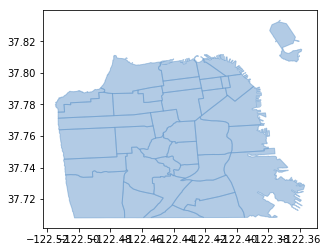

In [276]:
BLUE = '#6699cc'
fig = plt.figure() 
ax = fig.gca() 
for i in range(len(geodata['features'])):
    ax.add_patch(PolygonPatch(poly[i], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()
